# 중고차 가격 예측 모델 데이터 처리

## 필요한 패키지 import

In [438]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 데이터 Load

In [439]:
car_data = pd.read_csv('/content/drive/MyDrive/DataSet/Aiffel/England_Car/cars.csv')
brand_data = pd.read_csv('/content/drive/MyDrive/DataSet/Aiffel/England_Car/brand.csv')

## Column Describe

### car_data
#### 1. title : 차량 이름 / object
#### 2. **Price : 차량 가격(타겟 변수)** / int64
#### 3. Mileage : 주행 거리 / int64
#### 4. Registration_Year : 차량 등록 연도 / int64
#### 5. Previous Owners : 과거의 소유자 수(이 차를 사용한 사람) / float64
#### 6. Fuel type : 차량에 들어가는 기름 종류 / object
#### 7. Body type : 차량 외형 구조(Hatchback : 트렁크와 실내가 연결된 차량) / object
#### 8. Engine : 엔진 배기량 / object
#### 9. Gearbox : 차량의 변속기 / object
#### 10. Doors : 차량의 문 개수 / float64
#### 11. Seats : 좌석 개수 / float64
#### 12. Emission Class : 차량이 배출하는 오염 물질 양, 종류 분류 등급(Euro1 ~ 6 / 숫자가 높을 수록 엄격한 배출기준 / object
#### 13. Service history : 차량 유지 보수 기록 / object

In [440]:
car_data.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


### brand_data
#### 1. title : 차량 이름 / object
#### 2. country : 나라 / object

In [441]:
brand_data.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


------------
## 데이터 결합
### car 데이터와 brand 데이터의 title 컬럼을 이용하여 country 컬럼 추가

###  car_data로 부터 공백 기준으로 나누고 소문자로 변환(brand의 title컬럼과 일치화)

In [442]:
car_data['title'] = car_data['title'].str.split(expand = True)[0].str.lower()

In [443]:
car_data['title']

,title
0,skoda
1,vauxhall
2,hyundai
3,mini
4,vauxhall
...,...
3682,renault
3683,audi
3684,bmw
3685,honda


### car_data의 title컬럼을 기준으로 LEFT JOIN

In [444]:
car_data = car_data.merge(brand_data, on = 'title', how = 'left')

-----------
## 결측치 데이터
##### (Previous Owners, Engine, Doors, Seats, Emission Class, Service history)

In [445]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
 13  country            3687 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 403.4+ KB


In [446]:
brand_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    48 non-null     object
 1   country  48 non-null     object
dtypes: object(2)
memory usage: 896.0+ bytes


### Service history

#### Service history의 결측치가 너무 많음
#### 해당 데이터에 관한 정보가 없기에 결측치를 일단 Unknown으로 처리

In [447]:
car_data['Service history'].fillna('Unknown', inplace = True)

<ipython-input-447-8ac97e06c4bf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_data['Service history'].fillna('Unknown', inplace = True)


In [448]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    3687 non-null   object 
 13  country            3687 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 403.4+ KB


#### 결측치 변수가 많으므로 결측치가 4개이상인 데이터 Drop
##### 한 행에 결측치가 많으면 값을 채운다 한들 의미가 퇴색되는 데이터라고 생각

In [449]:
car_data.drop(car_data[car_data.isnull().sum(axis = 1) > 3].index, inplace = True)

In [450]:
len(car_data)

3674

------
### Previous Owners
#### 결측치 비율이 38%로 상당히 많은 것을 볼 수 있음

In [451]:
car_data['Previous Owners'].isnull().mean()

0.3829613500272183

In [452]:
car_data['Previous Owners'].describe()

,Previous Owners
count,2267.000000
mean,2.808999
std,1.547468
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,9.000000


<ipython-input-453-cd38147b3445>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_data['Previous Owners'])


<Axes: xlabel='Previous Owners', ylabel='Density'>

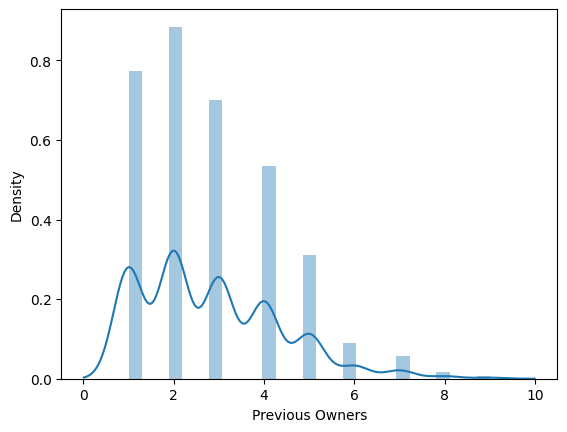

In [453]:
sns.distplot(car_data['Previous Owners'])

#### 그래프의 모양이 정규 분포를 따르게 결측치를 채움
##### >> 데이터의 평균으로 채움


In [454]:
car_data['Previous Owners'] = car_data['Previous Owners'].fillna(car_data['Previous Owners'].mean())

<ipython-input-455-cd38147b3445>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_data['Previous Owners'])


<Axes: xlabel='Previous Owners', ylabel='Density'>

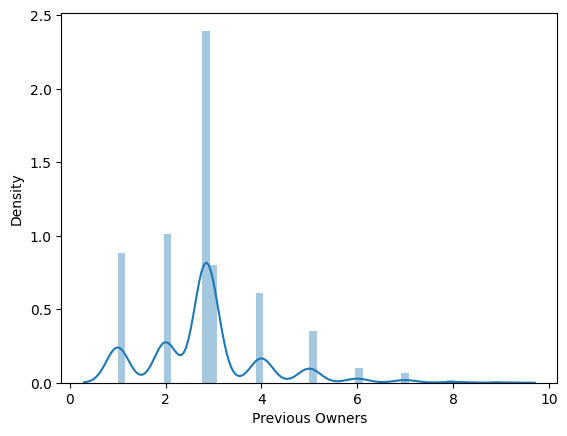

In [455]:
sns.distplot(car_data['Previous Owners'])

-----
### Engine
#### 결측치의 비율이 0.9% 현저히 낮음
#### + Engine 데이터 object에서 int형으로 변환

In [456]:
car_data['Engine'] = pd.to_numeric(car_data['Engine'].str[:3])

In [457]:
car_data['Engine'].isnull().mean()

0.009526401741970605

In [458]:
car_data['Engine'].describe()

,Engine
count,3639.000000
mean,1.606156
std,0.486650
min,0.800000
25%,1.300000
50%,1.600000
75%,1.900000
max,6.300000


<ipython-input-459-9e347b44235f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_data['Engine'])


<Axes: xlabel='Engine', ylabel='Density'>

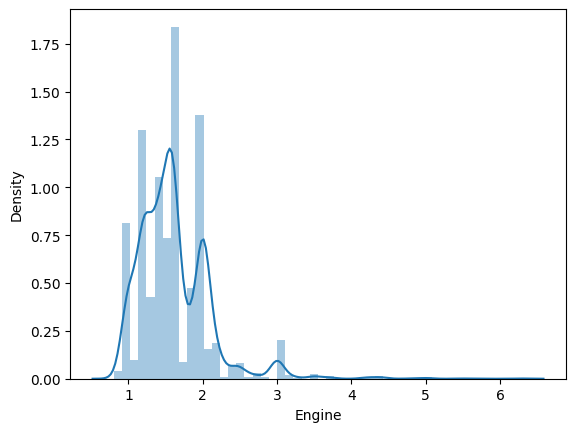

In [459]:
sns.distplot(car_data['Engine'])

#### 그래프가 정규 분포 모양을 따르게 제 3사분위의 값을 결측치로 채움

In [460]:
car_data['Engine'] = car_data['Engine'].fillna(car_data['Engine'].quantile(0.75))

<ipython-input-461-9e347b44235f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_data['Engine'])


<Axes: xlabel='Engine', ylabel='Density'>

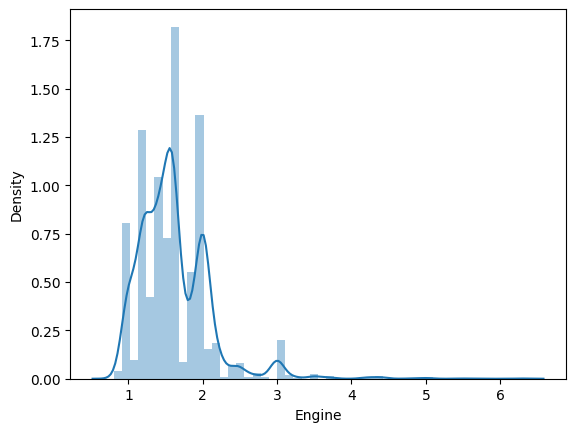

In [461]:
sns.distplot(car_data['Engine'])

----
### Doors
#### 결측치가 0.3%로 매우 미흡함

In [462]:
car_data['Doors'].isnull().mean()

0.00326619488296135

In [463]:
car_data['Doors'].describe()

,Doors
count,3662.000000
mean,4.321409
std,0.986760
min,2.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Q. 차량의 종류에 따라 문의 개수가 다를까?
##### A. 아우디의 경우 문의 개수가 3개인 경우가 있고 5개인 경우가 있음
##### - 결측치를 임의로 채울 경우 오히려 노이즈가 발생될 수 도 있음

In [464]:
car_data_td = pd.DataFrame(car_data.groupby('title')['Doors'].value_counts()).reset_index()
car_data_td.head(10)

,title,Doors,count
0,abarth,3.0,3
1,alfa,3.0,9
2,alfa,5.0,5
3,alfa,4.0,3
4,alfa,2.0,1
5,audi,5.0,47
6,audi,4.0,44
7,audi,3.0,30
8,audi,2.0,25
9,bmw,4.0,105


#### 문의 개수와 차의 가격의 상관 관계 분석
##### 0.11로 매우 낮은 연관성을 가지고 있음
##### 결측치의 비율도 0.3%이기에 채우지 않고 Drop

In [465]:
car_data[['Doors', 'Price']].corr()

,Doors,Price
Doors,1.000000,0.113335
Price,0.113335,1.000000


In [466]:
car_data.drop(car_data[car_data['Doors'].isnull()].index, inplace = True)

In [467]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3662 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3662 non-null   object 
 1   Price              3662 non-null   int64  
 2   Mileage(miles)     3662 non-null   int64  
 3   Registration_Year  3662 non-null   int64  
 4   Previous Owners    3662 non-null   float64
 5   Fuel type          3662 non-null   object 
 6   Body type          3662 non-null   object 
 7   Engine             3662 non-null   float64
 8   Gearbox            3662 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3642 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    3662 non-null   object 
 13  country            3662 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 429.1+ KB


-----
### Seats
#### 결측치는 0.5%로 매우 비중이 낮음

In [468]:
car_data['Seats'].isnull().mean()

0.005461496450027308

In [469]:
car_data['Seats'].describe()

,Seats
count,3642.000000
mean,4.900329
std,0.574764
min,2.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,7.000000


#### Q. 문의 개수와 마찬가지로 좌석 개수도 차량 마다 다를까?
##### A. 아우디의 경우 좌석이 다른 것을 볼 수 있음

In [470]:
car_data_ts = pd.DataFrame(car_data.groupby('title')['Seats'].value_counts()).reset_index()
car_data_ts.head(10)

,title,Seats,count
0,abarth,4.0,3
1,alfa,4.0,9
2,alfa,5.0,9
3,audi,5.0,112
4,audi,4.0,32
5,audi,7.0,2
6,bmw,5.0,202
7,bmw,4.0,57
8,bmw,2.0,3
9,bmw,3.0,1


#### 좌석 개수와 가격의 상관 관계 분석
##### 음의 상관관계지만 거의 관련이 없는 것을 볼 수 있음
##### 결측치 비율또한 매우 낮기에 Drop

In [471]:
car_data[['Seats', 'Price']].corr()

,Seats,Price
Seats,1.00000,-0.02542
Price,-0.02542,1.00000


In [472]:
car_data.drop(car_data[car_data['Seats'].isnull()].index, inplace = True)

In [473]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3642 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3642 non-null   object 
 1   Price              3642 non-null   int64  
 2   Mileage(miles)     3642 non-null   int64  
 3   Registration_Year  3642 non-null   int64  
 4   Previous Owners    3642 non-null   float64
 5   Fuel type          3642 non-null   object 
 6   Body type          3642 non-null   object 
 7   Engine             3642 non-null   float64
 8   Gearbox            3642 non-null   object 
 9   Doors              3642 non-null   float64
 10  Seats              3642 non-null   float64
 11  Emission Class     3594 non-null   object 
 12  Service history    3642 non-null   object 
 13  country            3642 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 426.8+ KB


----
### Emission Class
#### 차량이 배출하는 오염 물질 양, 종류 분류 등급(Euro1 ~ 6)임
#### object 형식이 아니라 int형식으로 변형
#### 결측치의 비율은 1.3%로 미흡한 수준임

In [474]:
car_data['Emission Class']

,Emission Class
0,Euro 6
1,Euro 4
2,Euro 5
3,Euro 4
4,Euro 5
...,...
3682,Euro 4
3683,Euro 5
3684,Euro 5
3685,Euro 4


In [475]:
car_data['Emission Class'] = pd.to_numeric(car_data['Emission Class'].str.split(expand = True)[1])

In [476]:
car_data['Emission Class'].dtype

dtype('float64')

In [477]:
car_data['Emission Class'].isnull().mean()

0.013179571663920923

In [478]:
car_data['Emission Class'].describe()

,Emission Class
count,3594.000000
mean,4.915136
std,0.901666
min,1.000000
25%,4.000000
50%,5.000000
75%,6.000000
max,6.000000


#### Emission Class의 상관 관계 분석
##### 해당 과정에서 object열은 제외해야함


In [479]:
corr_df = car_data.drop(['title', 'Fuel type', 'Body type', 'Gearbox', 'Service history', 'country'], axis = 1)

#### 차량 등록 년도(Registration_Year)이 91%로 엄청 높은 관련이 있음(2. Price 70%)
##### Registeration_year과 Emission Class의 경우 관계가 너무 높아 **다중 공산성**도 의심해야함
##### >> 등록년도가 최신일 수록 Emission Class의 수치도 증가함
##### 결측치를 차량 등록년도별 최빈값의 등급으로 대체

In [480]:
corr_df.corr()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
Price,1.000000,-0.503301,0.779392,-0.403194,-0.025516,0.112912,-0.025420,0.703663
Mileage(miles),-0.503301,1.000000,-0.446452,0.269751,0.328687,-0.036367,0.093504,-0.380623
Registration_Year,0.779392,-0.446452,1.000000,-0.408093,-0.293845,0.215742,0.027649,0.918849
Previous Owners,-0.403194,0.269751,-0.408093,1.000000,0.144964,-0.113522,-0.021862,-0.372836
Engine,-0.025516,0.328687,-0.293845,0.144964,1.000000,-0.057757,0.073955,-0.262491
Doors,0.112912,-0.036367,0.215742,-0.113522,-0.057757,1.000000,0.497160,0.177544
Seats,-0.025420,0.093504,0.027649,-0.021862,0.073955,0.497160,1.000000,0.022541
Emission Class,0.703663,-0.380623,0.918849,-0.372836,-0.262491,0.177544,0.022541,1.000000


#### 차량 등록년도 별 Emission Class의 최빈값 구하기
##### 같은 년도의 결측치가 아닌 Emission Class의 값이 없는 경우가 있음
##### 결측치 값을 가지고 있으면서 1987, 1988의 컬럼은 Drop

In [481]:
year_mode = car_data.groupby('Registration_Year')['Emission Class'].agg(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index()

In [482]:
year_mode

,Registration_Year,Emission Class
0,1987,NaN
1,1988,NaN
2,1993,1.0
3,1997,2.0
4,1998,2.0
5,1999,3.0
6,2000,3.0
7,2001,2.0
8,2002,3.0
9,2003,3.0


In [483]:
car_data.drop(car_data[(car_data['Emission Class'].isnull()) & ((car_data['Registration_Year'] == 1987) | (car_data['Registration_Year'] == 1988))].index, inplace = True)

In [484]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3640 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3640 non-null   object 
 1   Price              3640 non-null   int64  
 2   Mileage(miles)     3640 non-null   int64  
 3   Registration_Year  3640 non-null   int64  
 4   Previous Owners    3640 non-null   float64
 5   Fuel type          3640 non-null   object 
 6   Body type          3640 non-null   object 
 7   Engine             3640 non-null   float64
 8   Gearbox            3640 non-null   object 
 9   Doors              3640 non-null   float64
 10  Seats              3640 non-null   float64
 11  Emission Class     3594 non-null   float64
 12  Service history    3640 non-null   object 
 13  country            3640 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 426.6+ KB


#### 결측치의 컬럼 값을 최빈값으로 대체 하려고 했으나 적용 단계에서 되지 않아 결측치가 존재하는 컬럼 Drop

In [485]:
car_data.drop(car_data[car_data['Emission Class'].isnull()].index, inplace = True)

In [486]:
car_data['Registration_Year'].unique()

array([2016, 2008, 2011, 2010, 2013, 2007, 2009, 2019, 2004, 2003, 2017,
       2006, 2020, 2005, 1999, 2002, 2014, 2012, 2015, 2000, 2018, 2001,
       1998, 1997, 2022, 2021, 1993, 2023])

------
## 이상치
#### Price의 경우 평균 값에 비해 너무 높은 가격이 존재함(이상치 의심)
#### Previous Owners의 경우도 평균 값에 비해 조금 높은 수치가 존재(이상치 의심)

In [487]:
car_data.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
count,3594.000000,3.594000e+03,3594.000000,3594.000000,3594.000000,3594.000000,3594.000000,3594.000000
mean,5792.873122,8.150680e+04,2011.954368,2.806173,1.603255,4.318865,4.898442,4.915136
std,4514.862135,3.953673e+04,4.740717,1.216408,0.485433,0.986209,0.575483,0.901666
min,400.000000,1.000000e+00,1993.000000,1.000000,0.800000,2.000000,2.000000,1.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,1.300000,3.000000,5.000000,4.000000
50%,3999.500000,8.000000e+04,2012.000000,2.808999,1.600000,5.000000,5.000000,5.000000
75%,7999.750000,1.030742e+05,2016.000000,3.000000,1.900000,5.000000,5.000000,6.000000
max,33900.000000,1.110100e+06,2023.000000,9.000000,6.300000,5.000000,7.000000,6.000000


### Price
#### 가격이 25000 이상인 차의 표본 수가 6개인 것을 확인
#### 30000는 이상치가 맞으며 추가로 표본이 적어 노이즈를 일으킬 수 있는 Data Drop

<Axes: xlabel='None', ylabel='Price'>

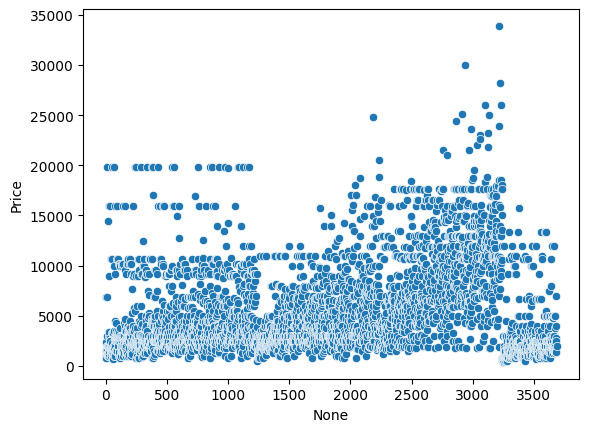

In [488]:
sns.scatterplot(x = car_data.index, y = car_data['Price'])

In [489]:
car_data.drop(car_data[car_data['Price'] > 25000].index, inplace = True)

In [490]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3588 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3588 non-null   object 
 1   Price              3588 non-null   int64  
 2   Mileage(miles)     3588 non-null   int64  
 3   Registration_Year  3588 non-null   int64  
 4   Previous Owners    3588 non-null   float64
 5   Fuel type          3588 non-null   object 
 6   Body type          3588 non-null   object 
 7   Engine             3588 non-null   float64
 8   Gearbox            3588 non-null   object 
 9   Doors              3588 non-null   float64
 10  Seats              3588 non-null   float64
 11  Emission Class     3588 non-null   float64
 12  Service history    3588 non-null   object 
 13  country            3588 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 420.5+ KB


### Seats
#### Price의 이상치를 처리하면서 9개의 좌석을 가진 데이터도 함께 제거

<Axes: xlabel='None', ylabel='Seats'>

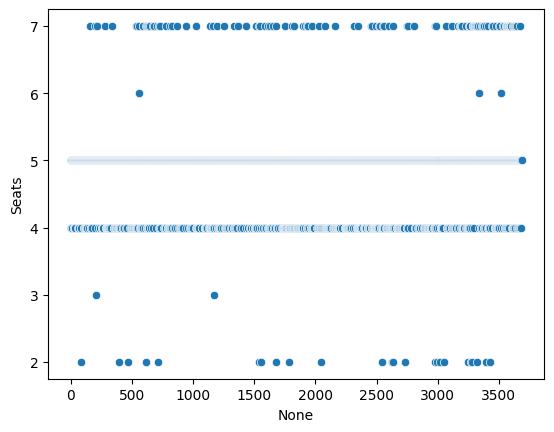

In [491]:
sns.scatterplot(x = car_data.index, y = car_data['Seats'])

## 중복
#### 중복된 행의 개수가 887개임을 볼 수 있음 >> Drop

In [492]:
car_data[car_data.duplicated(keep=False)].sort_values('title')

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
2710,audi,16555,68603,2017,1.000000,Diesel,Coupe,2.0,Automatic,2.0,4.0,6.0,Full,Germany
2588,audi,6495,96000,2013,2.808999,Diesel,Coupe,2.0,Automatic,3.0,4.0,5.0,Unknown,Germany
2466,audi,16555,68603,2017,1.000000,Diesel,Coupe,2.0,Automatic,2.0,4.0,6.0,Full,Germany
1530,audi,7990,80000,2012,2.808999,Petrol,Saloon,1.8,Manual,4.0,5.0,5.0,Unknown,Germany
1519,audi,7990,80000,2012,2.808999,Petrol,Saloon,1.8,Manual,4.0,5.0,5.0,Unknown,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933,volvo,795,274100,2004,6.000000,Petrol,Estate,2.4,Automatic,5.0,5.0,3.0,Unknown,Sweden
1685,volvo,795,274100,2004,6.000000,Petrol,Estate,2.4,Automatic,5.0,5.0,3.0,Unknown,Sweden
1259,volvo,795,274100,2004,6.000000,Petrol,Estate,2.4,Automatic,5.0,5.0,3.0,Unknown,Sweden
1946,volvo,795,274100,2004,6.000000,Petrol,Estate,2.4,Automatic,5.0,5.0,3.0,Unknown,Sweden


### 중복된 행 제거

In [493]:
car_data = car_data.drop_duplicates(keep=False)

In [494]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 1 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2701 non-null   object 
 1   Price              2701 non-null   int64  
 2   Mileage(miles)     2701 non-null   int64  
 3   Registration_Year  2701 non-null   int64  
 4   Previous Owners    2701 non-null   float64
 5   Fuel type          2701 non-null   object 
 6   Body type          2701 non-null   object 
 7   Engine             2701 non-null   float64
 8   Gearbox            2701 non-null   object 
 9   Doors              2701 non-null   float64
 10  Seats              2701 non-null   float64
 11  Emission Class     2701 non-null   float64
 12  Service history    2701 non-null   object 
 13  country            2701 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 316.5+ KB


----------
## EDA 맛보기

### 국가별 브랜드의 개수

In [520]:
car_data.groupby('country')['title'].nunique().reset_index()

,country,title
0,Czech Republic,1
1,France,4
2,Germany,6
3,Italy,4
4,Japan,10
5,Malaysia,1
6,Romania,1
7,South Korea,4
8,Spain,1
9,Sweden,2


In [514]:
brand_data.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


## One hot Encoding
### title의 경우 고유 컬럼의 개수가 너무 많아 그룹화를 해야할 듯(현재 불가능)

In [496]:
print(f"title의 고유 값의 개수는 {car_data['title'].nunique()}")
print(f"Fuel type의 고유 값의 개수는 {car_data['Fuel type'].nunique()}")
print(f"Body type의 고유 값의 개수는 {car_data['Body type'].nunique()}")
print(f"Gearbox의 고유 값의 개수는 {car_data['Gearbox'].nunique()}")
print(f"Service history의 고유 값의 개수는 {car_data['Service history'].nunique()}")
print(f"country의 고유 값의 개수는 {car_data['country'].nunique()}")

title의 고유 값의 개수는 45
Fuel type의 고유 값의 개수는 5
Body type의 고유 값의 개수는 9
Gearbox의 고유 값의 개수는 2
Service history의 고유 값의 개수는 2
country의 고유 값의 개수는 12



### title 및 결측치가 존재하는 Service history를 제외한 나머지 컬럼 원 핫 인코딩 진행

In [497]:
cleaning_car_data = pd.get_dummies(car_data, columns = ['Fuel type', 'Body type', 'Gearbox', 'country'], drop_first = True)

In [498]:
cleaning_car_data

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Service history,...,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States
1,vauxhall,1495,88585,2008,4.000000,1.2,3.0,5.0,4.0,Full,...,False,False,False,False,False,False,False,False,True,False
2,hyundai,949,137000,2011,2.808999,1.4,5.0,5.0,5.0,Unknown,...,False,False,False,False,False,True,False,False,False,False
3,mini,2395,96731,2010,5.000000,1.4,3.0,4.0,4.0,Full,...,False,False,False,False,False,False,False,False,True,False
4,vauxhall,1000,85000,2013,2.808999,1.3,5.0,5.0,5.0,Unknown,...,False,False,False,False,False,False,False,False,True,False
5,hyundai,800,124196,2007,3.000000,2.0,3.0,4.0,4.0,Unknown,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,renault,1395,76202,2006,4.000000,1.6,5.0,5.0,4.0,Unknown,...,False,False,False,False,False,False,False,False,False,False
3683,audi,6990,119000,2012,2.808999,2.0,4.0,5.0,5.0,Unknown,...,True,False,False,False,False,False,False,False,False,False
3684,bmw,3995,139000,2013,2.808999,2.0,4.0,5.0,5.0,Unknown,...,True,False,False,False,False,False,False,False,False,False
3685,honda,1390,179190,2007,2.808999,2.2,5.0,5.0,4.0,Full,...,False,False,True,False,False,False,False,False,False,False


## Scaling
### Standard Scaling 사용(모든 결측치를 채울 때 정규분포를 따르도록 채움)
### object 형식은 title과 Service history의 경우 따로 빼두었다가 병합

In [499]:
cleaning_car_data_object = cleaning_car_data[['title', 'Service history']]
cleaning_car_data.drop(['title', 'Service history'], axis = 1, inplace = True)

In [500]:
cleaning_car_data_object

,title,Service history
1,vauxhall,Full
2,hyundai,Unknown
3,mini,Full
4,vauxhall,Unknown
5,hyundai,Unknown
...,...,...
3682,renault,Unknown
3683,audi,Unknown
3684,bmw,Unknown
3685,honda,Full


### Standard 스케일링 적용후 데이터프레임 화

In [501]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

cleaning_car_data_s = pd.DataFrame(ss.fit_transform(cleaning_car_data) , columns = cleaning_car_data.columns)

cleaning_car_data_s

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Fuel type_Diesel Hybrid,Fuel type_Petrol,...,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States
0,-0.946827,0.111301,-0.753796,0.908903,-0.865419,-1.355017,0.195973,-0.928919,-0.019245,0.752195,...,-0.569227,-0.199113,-0.436941,-0.027222,-0.072182,-0.230264,-0.12568,-0.119456,2.033465,-0.375642
1,-1.084262,1.336555,-0.083028,-0.040837,-0.480107,0.686199,0.195973,0.216225,-0.019245,0.752195,...,-0.569227,-0.199113,-0.436941,-0.027222,-0.072182,4.342844,-0.12568,-0.119456,-0.491771,-0.375642
2,-0.720286,0.317454,-0.306618,1.706333,-0.480107,-1.355017,-1.511518,-0.928919,-0.019245,0.752195,...,-0.569227,-0.199113,-0.436941,-0.027222,-0.072182,-0.230264,-0.12568,-0.119456,2.033465,-0.375642
3,-1.071425,0.020574,0.364150,-0.040837,-0.672763,0.686199,0.195973,0.216225,-0.019245,-1.329443,...,-0.569227,-0.199113,-0.436941,-0.027222,-0.072182,-0.230264,-0.12568,-0.119456,2.033465,-0.375642
4,-1.121768,1.012520,-0.977385,0.111473,0.675830,-1.355017,-1.511518,-0.928919,-0.019245,0.752195,...,-0.569227,-0.199113,-0.436941,-0.027222,-0.072182,4.342844,-0.12568,-0.119456,-0.491771,-0.375642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2696,-0.971999,-0.202080,-1.200974,0.908903,-0.094795,0.686199,0.195973,-0.928919,-0.019245,0.752195,...,-0.569227,-0.199113,-0.436941,-0.027222,-0.072182,-0.230264,-0.12568,-0.119456,-0.491771,-0.375642
2697,0.436333,0.881023,0.140561,-0.040837,0.675830,-0.334409,0.195973,0.216225,-0.019245,0.752195,...,1.756768,-0.199113,-0.436941,-0.027222,-0.072182,-0.230264,-0.12568,-0.119456,-0.491771,-0.375642
2698,-0.317546,1.387170,0.364150,-0.040837,0.675830,-0.334409,0.195973,0.216225,-0.019245,-1.329443,...,1.756768,-0.199113,-0.436941,-0.027222,-0.072182,-0.230264,-0.12568,-0.119456,-0.491771,-0.375642
2699,-0.973257,2.404272,-0.977385,-0.040837,1.061142,0.686199,0.195973,-0.928919,-0.019245,-1.329443,...,-0.569227,-0.199113,2.288640,-0.027222,-0.072182,-0.230264,-0.12568,-0.119456,-0.491771,-0.375642


## PCA 추출
#### 목표 : 70%까지의 PCA추출

#### 약 15개의 PCA사용

In [502]:
#PCA 패키지를 불러옴
from sklearn.decomposition import PCA

# 객체 생성
pca = PCA(15)

# 정보 학습
pca.fit(cleaning_car_data_s)

# 정보 변환
pd.DataFrame(pca.transform(cleaning_car_data_s))

(pca.explained_variance_ratio_).sum()

0.7045404662052476

### PCA끝낸 후 원래 컬럼인 title과 Service history 병합

In [503]:
cleaning_car_data_s = pd.concat([cleaning_car_data_object, cleaning_car_data_s], axis = 1)

## 회고


### 느낀점
### 데이터 클리닝과정의 연장선인 M/L에 넣기 위한 **원핫 인코딩**
### 값들의 특성이 다르므로 범위를 맞추기 위한 **스케일링**,
### 그리고 컬럼의 개수가 많을 때 이를 해결하고자 사용하는 **주성분 분석**까지 미니 프로젝트를 진행하면서
### 스스로도 조금이나마 감을 찾고 나만의 데이터 클리닝 과정을 정립해 나갈 수 있었다.
### 조금이나마 배우는 자세로 임하였기에 결측치 비율이 1%미만이더라도 바로 Drop 하지 않고 채울 수 있는 부분을
### 채울려고 노력 하여서 시간이 2배 가까이 소모되었지만 결측치를 채우는 과정은
### 매우 중요하다고 생각하기에 앞으로도 무작정 Drop하지 않고 계속해서 고민을 해볼 것이다.
### 프로젝트를 해결하는데 있어서 너무 재미있었고 또 앞으로 이런 프로젝트가 있으면 좋을 것 같다.

</br>

## 혹시 코드중에 조금 더 간추릴수 있는 부분이나 궁금한 사항은 코멘트 남겨주시면 감사하겠습니다!